# Logistic Regression

##### Problems with Lnear Regression

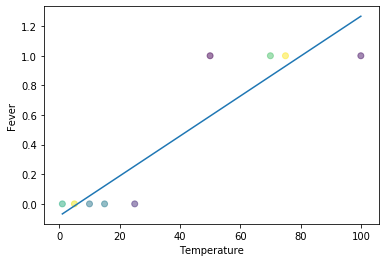

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = [1, 5, 10, 15, 25, 50, 70, 75, 100,]
y = [0, 0, 0, 0, 0, 1, 1, 1, 1]

colors = np.random.rand(len(x))
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.ylabel("Fever")
plt.xlabel("Temperature")

plt.scatter(x, y, c = colors, alpha = 0.5)
plt.show()

###### Linear Regression Problem 1
Fever value can go negative (below 0) and positive (above 1)

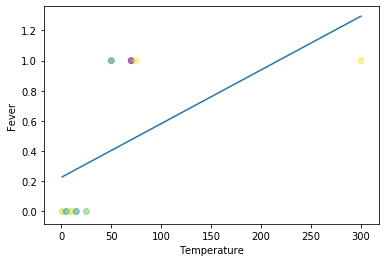

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = [1, 5, 10, 15, 25, 50, 70, 75, 300,]
y = [0, 0, 0, 0, 0, 1, 1, 1, 1]

colors = np.random.rand(len(x))
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.ylabel("Fever")
plt.xlabel("Temperature")

plt.scatter(x, y, c = colors, alpha = 0.5)
plt.show()

###### Linear Regression Problem 2
Fever points not predicted with outliers

## Build logistic Regression Model

In [3]:
import math

print(-math.log(1 - 0.00001))
print(-math.log(1 - 0.99999))

print(math.log(0.99999))
print(math.log(0.00001))

1.0000050000287824e-05
11.51292546497478
-1.0000050000287824e-05
-11.512925464970229


### Steps

<li> Step 1: Load Dataset
<li> Step 2: Make Dataset Iterable
<li> Step 3: Create Model Class
<li> Step 4: Instantiable Model Class
<li> Step 5: Instantiable Loss Class
<li> Step 6: Instantiable Optimizer Class
<li> Step 7: Train Model


#### Step 1: Load Dataset

In [4]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable


In [5]:
train_dataset = dsets.MNIST(root = './data',
                            train = True,
                            transform = transforms.ToTensor(),
                            download = True)

In [6]:
len(train_dataset)

60000

In [7]:
train_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [8]:
type(train_dataset[0])

tuple

In [9]:
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [10]:
train_dataset[0][1]

5

##### Displaying MNIST

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [12]:
train_dataset[10][0].numpy().shape

(1, 28, 28)

In [13]:
show_img = train_dataset[10][0].numpy().reshape(28, 28)

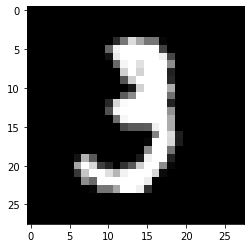

In [14]:
plt.imshow(show_img, cmap = 'gray')

In [15]:
train_dataset[10][1]

3

In [16]:
show_img = train_dataset[10535][0].numpy().reshape(28, 28)

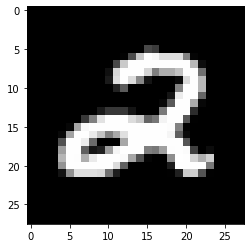

In [17]:
plt.imshow(show_img, cmap = 'gray')

In [18]:
train_dataset[10535][1]

2

##### Loading MNIST Test Dataset

In [19]:
test_dataset = dsets.MNIST(root = './data',
                           train = False,
                           transform = transforms.ToTensor())

In [20]:
len(test_dataset)

10000

In [21]:
type(test_dataset[0])

tuple

In [22]:
test_dataset[0][0].size()

torch.Size([1, 28, 28])

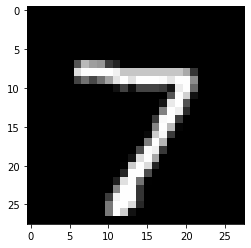

In [23]:
show_img = test_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap = 'gray')

In [24]:
test_dataset[0][1]

7

#### Step 2: Make Dataset Iterable

In [25]:
len(train_dataset)

60000

In [26]:
batch_size = 100

In [27]:
n_iters = 3000

In [28]:
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
num_epochs

5

##### Create Iterable Object: Training Dataset

In [29]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)

##### Check Iterability

In [30]:
import collections
isinstance(train_loader, collections.Iterable)

True

##### Create Iterable Object: Testing Dataset

In [31]:
# Iterable object
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, 
                                          batch_size = batch_size,
                                          shuffle = False)

##### Check Iterability

In [32]:
import collections
isinstance(test_loader, collections.Iterable)

True

##### Main Aim: Iterate throughout Dataset

In [33]:
img_1 = np.ones((28, 28))
img_2 = np.ones((28, 28))
lst = [img_1, img_2]


In [34]:
# Need to iterate 
# Think of the numbers as the images
for i in lst:
    print(i.shape)

(28, 28)
(28, 28)


#### Step 3: Building Model

In [35]:
# Same as Linear Regression!
# Create class
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

#### Step 4: Instantiate Model Class

In [36]:
# Size of images
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [39]:
input_dim = 28*28
output_dim = 10

In [40]:
model = LogisticRegressionModel(input_dim, output_dim)

#### Step 5: Instantiate Loss Class

In [41]:
criterion = nn.CrossEntropyLoss()

**What happens in nn.CrossEntropyLoss()?**
<li> Computes softmax (logistic/softmax function)
<li> Computer Cross Entropy

#### Step 6: Instantiate Optimizer Class

In [42]:
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

##### Parameters In-Depth

In [45]:
print(model.parameters())

print(len(list(model.parameters())))

# FC1 Parameters 
print(list(model.parameters())[0].size())

# FC1 Bias Parameters 
print(list(model.parameters())[1].size())

<generator object Module.parameters at 0x0000021007B2E5C8>
2
torch.Size([10, 784])
torch.Size([10])
